In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
from utils import scatter_plot, qqplot

# Dataset Analysis

In [2]:
tauraat = pd.read_csv('./tauraat-2022-10-24.csv', converters={'site_no': str}, low_memory=False)

## Remove Zero/ Missing Values

In [3]:
tauraat.shape

(2802532, 37)

In [5]:
candidate_columns = ['drain_area_va', 'discharge_va', 'gage_height_va', 'chan_width', 'chan_area', 'chan_velocity']

tau_no_zero = tauraat[(tauraat[candidate_columns] != 0).all(axis=1)]
tau_no_nan = tau_no_zero.dropna(axis=0, subset=candidate_columns)
print(f"dataset size: {tau_no_nan.shape}")

dataset size: (2187569, 37)


## First Scenario: Same site stations as HYDRoSWOT subset

In [8]:
hydro_subset = pd.read_csv('./data/HYDRoSWOT_subset.csv', converters={'site_no': str}, low_memory=False)

In [9]:
hydro_subset_unique = hydro_subset.drop_duplicates(subset='site_no', keep='first')
hydro_subset_unique.shape

(5395, 9)

In [13]:
tauraat_sc1 = tau_no_nan[tau_no_nan["site_no"].isin(hydro_subset_unique['site_no'].to_list())]
print(tauraat_sc1.shape)
tauraat_sc1['site_no'].value_counts().describe()

(1659934, 37)


count    5394.000000
mean      307.737115
std       285.228315
min         1.000000
25%       138.000000
50%       254.000000
75%       382.000000
max      6576.000000
Name: site_no, dtype: float64

In [14]:
idx = tauraat_sc1['chan_area'] / tauraat_sc1['chan_width']

pct = 0.0001
tauraat_sc1 = tauraat_sc1[(idx > idx.quantile(pct)) & (idx < idx.quantile(1-pct))]

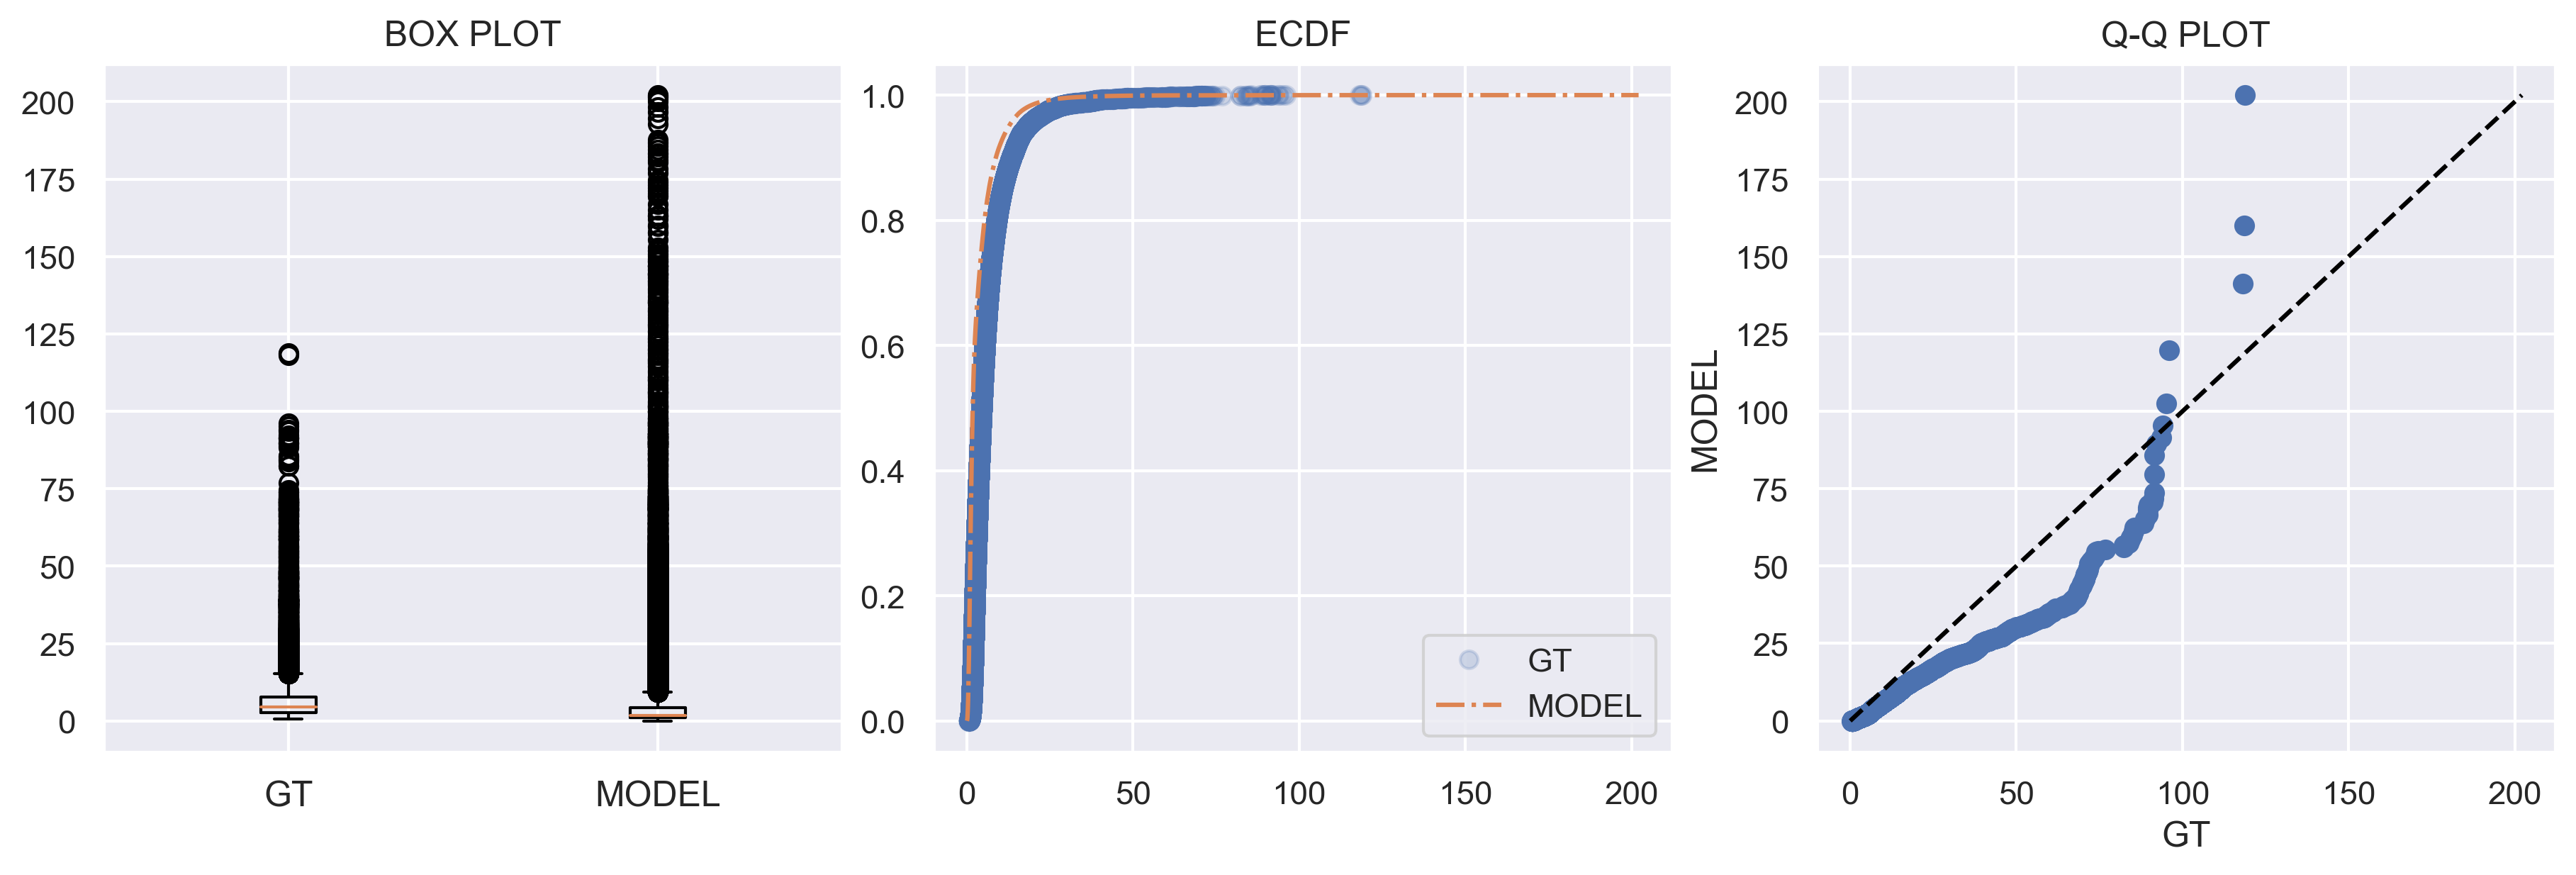

In [16]:
qqplot(hydro_subset['mean_depth_va'], tauraat_sc1['chan_area'] / tauraat_sc1['chan_width'])

The x – quantiles are lower than the y – quantiles. It indicates x values have a tendency to be lower than the y values.

In [18]:
tauraat_sc1.reset_index(drop=True, inplace=True)
print(tauraat_sc1.shape)
tauraat_sc1['site_no'].value_counts().describe()

(1659602, 37)


count    5394.000000
mean      307.675565
std       285.155894
min         1.000000
25%       138.000000
50%       254.000000
75%       382.000000
max      6573.000000
Name: site_no, dtype: float64

## Second Scenario: TAURAAT Sites with more than 50 Observations

In [19]:
tau_site_obs = tau_no_nan['site_no'].value_counts()
tau_stat = tau_no_nan[tau_no_nan["site_no"].isin(tau_site_obs.index[tau_site_obs>=50].to_list())]

print("site locations with minimum of 50 observations: ")
print(f'Number of observations: {tau_stat.shape}')
print('Number of sites:')
tau_stat['site_no'].value_counts().describe()

site locations with minimum of 50 observations: 
Number of observations: (2162090, 37)
Number of sites:


count    6874.000000
mean      314.531568
std       266.754676
min        50.000000
25%       152.000000
50%       255.000000
75%       382.000000
max      6576.000000
Name: site_no, dtype: float64

### Positive Discharge

In [20]:
tau_pos_dis = pd.DataFrame()
for site, group in tau_stat.groupby("site_no"):
   if (group["discharge_va"].values > 0).all():
        tau_pos_dis = pd.concat([tau_pos_dis, group], ignore_index=True)

tau_pos_dis = tau_pos_dis[tau_pos_dis['chan_area'] > 0]
print(f'Number of observations: {tau_pos_dis.shape}')
print("site locations with positive discharge: ")
tau_pos_dis['site_no'].value_counts().describe()

Number of observations: (2124655, 37)
site locations with positive discharge: 


count    6720.000000
mean      316.168899
std       268.215321
min        50.000000
25%       154.000000
50%       257.000000
75%       383.000000
max      6576.000000
Name: site_no, dtype: float64

In [21]:
tauraat_sc2 = tau_pos_dis[tau_pos_dis['site_tp_cd'].isin(['ST', 'ST-DCH', 'ST-CA'])]

In [24]:
idx2 = tauraat_sc2['chan_area'] / tauraat_sc2['chan_width']

pct = 0.0001
tauraat_sc2 = tauraat_sc2[(idx2 > idx2.quantile(pct)) & (idx2 < idx2.quantile(1-pct))]

In [25]:
tauraat_sc2.reset_index(drop=True, inplace=True)
print(f'Number of observations: {tauraat_sc2.shape}')
tauraat_sc2['site_no'].value_counts().describe()

Number of observations: (2122371, 37)


count    6711.000000
mean      316.252570
std       268.233863
min        50.000000
25%       154.000000
50%       257.000000
75%       383.000000
max      6573.000000
Name: site_no, dtype: float64

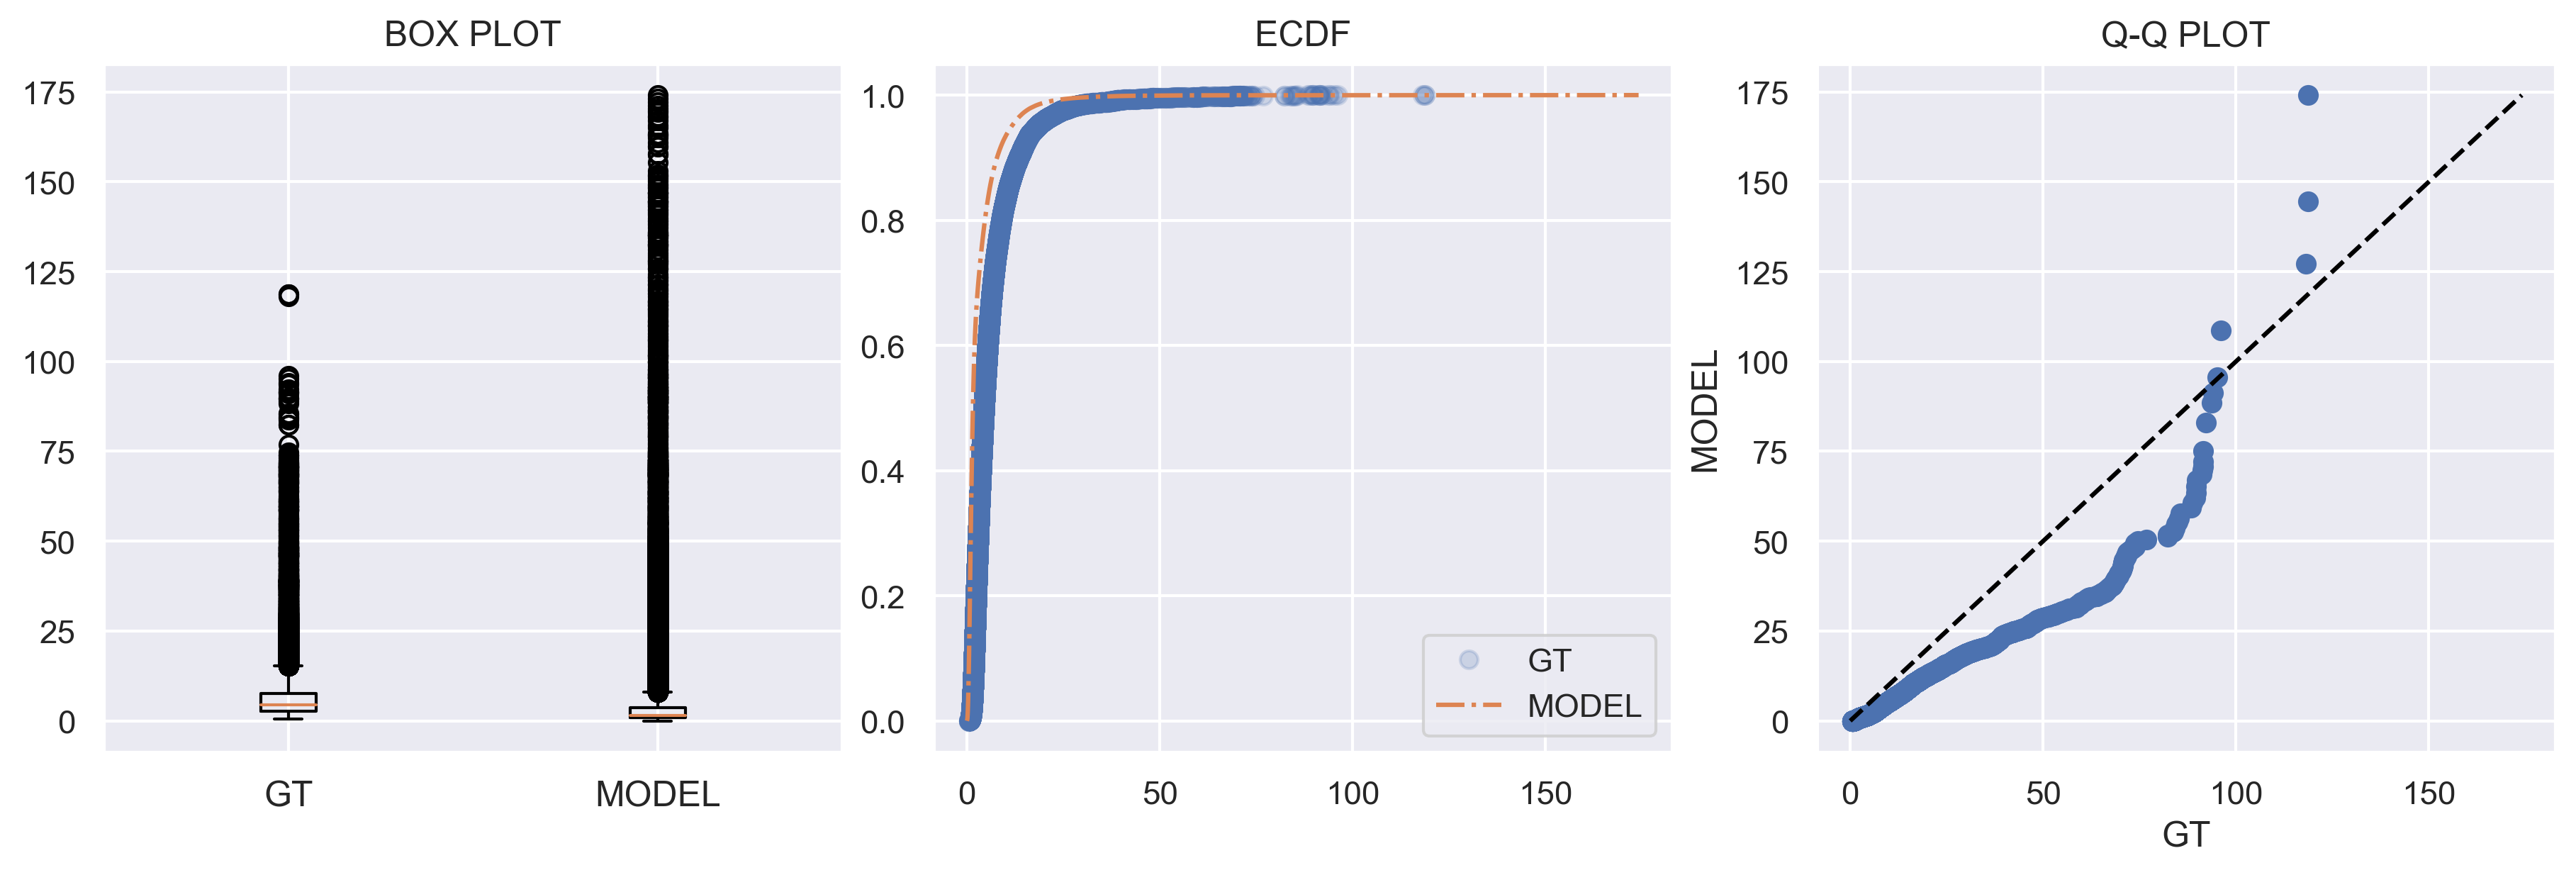

In [26]:
qqplot(hydro_subset['mean_depth_va'], tauraat_sc2['chan_area'] / tauraat_sc2['chan_width'])